<a href="https://colab.research.google.com/github/monikabril/codelabv1/blob/master/webScrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SCRAPING CON PYTHON

In [0]:
# requests for fetching html of website
import requests

# Make the request to a url
r = requests.get('http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html')

# Create soup from content of request
c = r.content

from bs4 import BeautifulSoup

soup = BeautifulSoup(c)

Encontrar el elemento en la pagina web

In [10]:
# Find the element on the webpage
main_content = soup.find('div', attrs = {'class': 'entry-content'})
main_content

<div class="entry-content"> <p class="article__paragraph">CLEVELAND, Ohio - <a href="http://www.case.edu/">Case Western Reserve University </a>President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.</p><p class="article__paragraph">Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the <a href="http://chronicle.com/">Chronicle of Higher Education.</a></p> <div class="ad ad--in-article" id="in-article_AOJSWF2SO5F6NLAFYE77J7FAPI"></div> <p class="article__paragraph">She is among 58 presidents to earn $1 million or more. The previous year, 39 private college presidents earned more than $1 million.</p><p class="article__paragraph">The Chronicle's <a href="https://www.chronicle.com/interactives/executive-compensation#id=table_private_2015">

Que informacion se extrae?

In [119]:
# Extract the relevant information
content = main_content.find('ul').text

import pprint
pprint.pprint(content)

(' Grant Cornwell, College of Wooster (left in 2015): $911,651 Marvin Krislov, '
 'Oberlin College (left in 2016): \xa0$829,913 Mark Roosevelt, Antioch '
 'College, (left in 2015): $507,672 Laurie Joyner, Wittenberg University (left '
 'in 2015): $463,504 Richard Giese, University of Mount Union (left in 2015): '
 '$453,800 Sean Decatur,Kenyon College: $451,698 Adam Weinberg, Denison '
 'University: $435,322 Daniel Dibiasio, Ohio Northern University: $414,716 '
 'Denvy Bowman, Capital University (left in 2016): $388,570 Anne Steele, '
 'Muskingum University (left in 2016): $384,233 Kathy Krendl, Otterbein '
 'University: \xa0$378,035 Rockwell Jones, Ohio Wesleyan University: $366,625 '
 'Robert Helmer, Baldwin Wallace University: $365,616 Robert Huntington, '
 'Heidelberg University: $300,005 Lori Varlotta, Hiram College: $293,336 '
 'Joseph Bruno, Marietta College (left in 2016): $288,295 W. Richard Merriman '
 'Jr., University of Mount Union (started in June 2015): $221,761 ')


In [145]:
import re

# Create a pattern to match names
name_pattern = re.findall(r"^([A-Z]{1}.*?,)(?:,)", content)
#name_pattern.findall(content)
content

' Grant Cornwell, College of Wooster (left in 2015): $911,651 Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913 Mark Roosevelt, Antioch College, (left in 2015): $507,672 Laurie Joyner, Wittenberg University (left in 2015): $463,504 Richard Giese, University of Mount Union (left in 2015): $453,800 Sean Decatur,Kenyon College: $451,698 Adam Weinberg, Denison University: $435,322 Daniel Dibiasio, Ohio Northern University: $414,716 Denvy Bowman, Capital University (left in 2016): $388,570 Anne Steele, Muskingum University (left in 2016): $384,233 Kathy Krendl, Otterbein University: \xa0$378,035 Rockwell Jones, Ohio Wesleyan University: $366,625 Robert Helmer, Baldwin Wallace University: $365,616 Robert Huntington, Heidelberg University: $300,005 Lori Varlotta, Hiram College: $293,336 Joseph Bruno, Marietta College (left in 2016): $288,295 W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761 '

In [0]:
#names = name_pattern.findall(content)

In [144]:
name_pattern

[]

In [88]:
# Remind ourselves what our soup looks like
pprint.pprint(content)

(' Grant Cornwell, College of Wooster (left in 2015): $911,651 Marvin Krislov, '
 'Oberlin College (left in 2016): \xa0$829,913 Mark Roosevelt, Antioch '
 'College, (left in 2015): $507,672 Laurie Joyner, Wittenberg University (left '
 'in 2015): $463,504 Richard Giese, University of Mount Union (left in 2015): '
 '$453,800 Sean Decatur,Kenyon College: $451,698 Adam Weinberg, Denison '
 'University: $435,322 Daniel Dibiasio, Ohio Northern University: $414,716 '
 'Denvy Bowman, Capital University (left in 2016): $388,570 Anne Steele, '
 'Muskingum University (left in 2016): $384,233 Kathy Krendl, Otterbein '
 'University: \xa0$378,035 Rockwell Jones, Ohio Wesleyan University: $366,625 '
 'Robert Helmer, Baldwin Wallace University: $365,616 Robert Huntington, '
 'Heidelberg University: $300,005 Lori Varlotta, Hiram College: $293,336 '
 'Joseph Bruno, Marietta College (left in 2016): $288,295 W. Richard Merriman '
 'Jr., University of Mount Union (started in June 2015): $221,761 ')


In [89]:
# Make school patttern and examine results
school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
school_pattern.findall(content)

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'University of Mount Union',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']

In [0]:
# Extract the schools
schools = school_pattern.findall(content)

In [108]:
# Pattern to match the salaries
salary_pattern = re.findall(r"(\$.\.?\d*\.?)", content)
#salary_pattern= re.findall(r"(?<![a-zA-Z:])[-+]?\$.\.?\d*\.?", content)

#salary_pattern.findall(content)
salary_pattern

['$911',
 '$829',
 '$507',
 '$463',
 '$453',
 '$451',
 '$435',
 '$414',
 '$388',
 '$384',
 '$378',
 '$366',
 '$365',
 '$300',
 '$293',
 '$288',
 '$221']

# Dolares a Numeros

In [42]:
# Messy salary
salary = '$876,001'

# Exclude the $ and split the string on the comma
salary[1:].split(',')

['876', '001']

In [43]:
# Same operation but now join the list with no space
''.join(salary[1:].split(','))

'876001'

In [44]:
# Finally convert the string to a float
float(''.join(salary[1:].split(',')))

876001.0

Ejemplo dentro de una lista

In [56]:
# Messy salaries
salaries = ['$876,001', '$543,903', '$2453,896']

# Convert salaries to numbers using the above procedure in a list comprehension 
[int(''.join(s[1:].split(','))) for s in salaries]

[876001, 543903, 2453896]

In [110]:
# Extract all the salaries and convert to integers
salaries = salary_pattern
#b = re.compile(r"\d+\.\d*")

salaries

['$911',
 '$829',
 '$507',
 '$463',
 '$453',
 '$451',
 '$435',
 '$414',
 '$388',
 '$384',
 '$378',
 '$366',
 '$365',
 '$300',
 '$293',
 '$288',
 '$221']

In [0]:
# Extract all the salaries and convert to integers
salaries = salary_pattern

# List comprehension to convert strings to floats
salaries = [int(''.join(s[1:].split(','))) for s in salaries]

In [114]:
salaries

[911,
 829,
 507,
 463,
 453,
 451,
 435,
 414,
 388,
 384,
 378,
 366,
 365,
 300,
 293,
 288,
 221]

In [117]:
# Sanity check to make sure everything is correct!
len(names) == len(schools) == len(salaries)

False

# PANDAS

In [0]:
import pandas as pd

# Put information into a dataframe
df = pd.DataFrame({'salary': salaries, 
                   #'President': names,
                   'College': schools})

# Append information
df.loc[17, :] = ['CWRU', 1154000]

# Sort the values by highest to lowest salary
df = df.sort_values('salary', ascending=False).reset_index().drop(columns='index')

In [179]:
df

,College,salary
0,CWRU,1154000.0
1,College of Wooster,911.0
2,Oberlin College,829.0
3,Antioch College,507.0
4,Wittenberg University,463.0
5,University of Mount Union,453.0
6,Kenyon College,451.0
7,Denison University,435.0
8,Ohio Northern University,414.0
9,Capital University,388.0


In [0]:
#df.plot(kind='barh', x = 'President', y = 'salary');

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pick a style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

import seaborn as sns

# Sort the values by highest to lowest salary
df = df.sort_values('salary', ascending=False).reset_index()

# Shorten this one name for plotting
df.loc[df['College'] == 'University of Mount Union', 'College'] = 'Mount Union'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


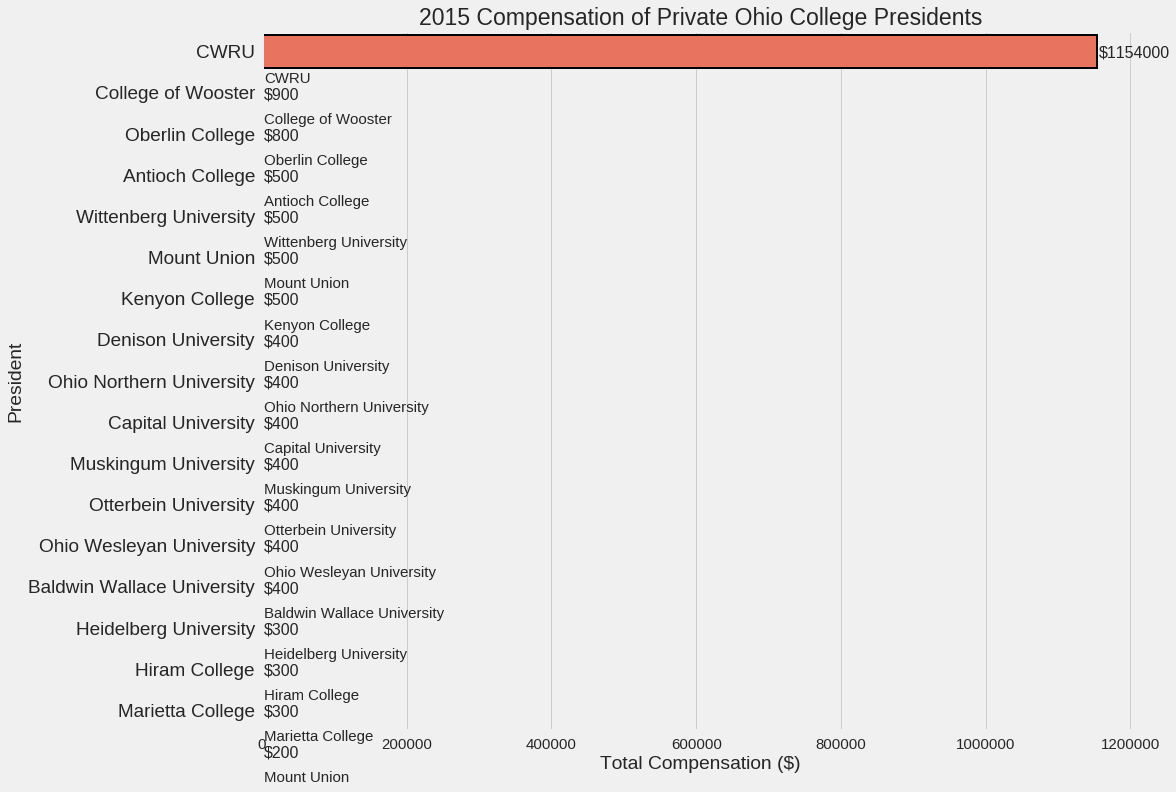

In [183]:
# Create the basic figure
plt.figure(figsize=(14, 12))
sns.barplot(x = 'salary', y = 'College', data = df, 
            color = 'tomato', edgecolor = 'k', linewidth = 2)

# Add text showing values and colleges
for i, row in df.iterrows():
  plt.text(x = row['salary'] + 2000, y = i + 0.15, s = '$%d' % (round(row['salary'] / 100) * 100))
  plt.text(x = 3000, y = i + 0.75, s = row['College'], size = 15)

# Labels are a must!
plt.xticks(size = 15); plt.yticks(size = 19)
plt.xlabel('Total Compensation ($)')
plt.ylabel('President') 
plt.title('2015 Compensation of Private Ohio College Presidents');

In [175]:
# Calculate value of 5 minutes of your presidents time
five_minutes_fraction = 5 / (2000 * 60)
total_df = pd.DataFrame(df.groupby('College')['salary'].sum())
total_df['five_minutes_cost'] = round(total_df['salary'] * five_minutes_fraction)
total_df = total_df.sort_values('five_minutes_cost', ascending = False).reset_index()

total_df

,College,salary,five_minutes_cost
0,CWRU,1154000.0,48.0
1,Antioch College,507.0,0.0
2,Marietta College,288.0,0.0
3,Otterbein University,378.0,0.0
4,Ohio Wesleyan University,366.0,0.0
5,Ohio Northern University,414.0,0.0
6,Oberlin College,829.0,0.0
7,Muskingum University,384.0,0.0
8,Mount Union,674.0,0.0
9,Kenyon College,451.0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


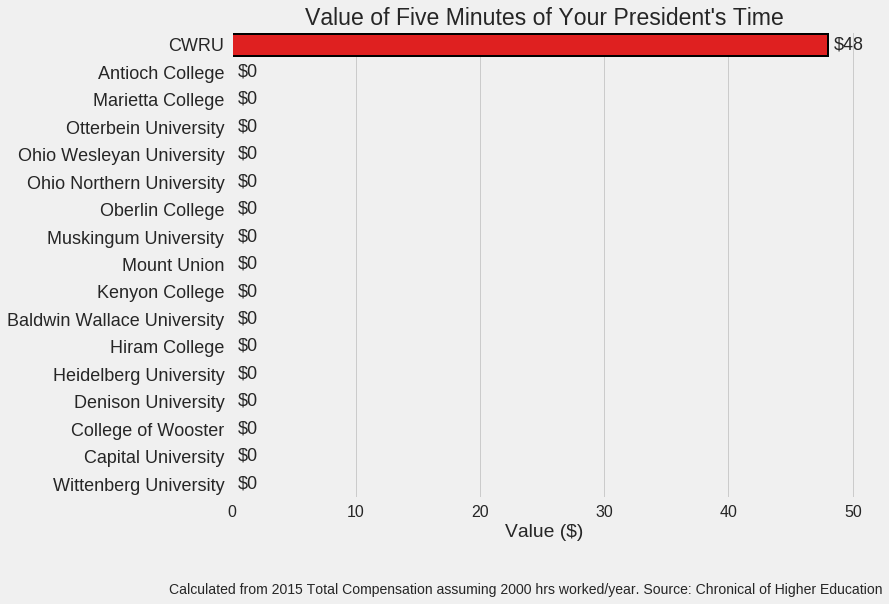

In [176]:
# Text for caption
txt = 'Calculated from 2015 Total Compensation assuming 2000 hrs worked/year. Source: Chronical of Higher Education'

# Create the basic barplot
plt.figure(figsize=(10, 8))
sns.barplot(x = 'five_minutes_cost', y = 'College', data = total_df, 
            color = 'red', edgecolor = 'k', linewidth = 2)

# Add the text with the value
for i, row in total_df.iterrows():
  plt.text(x = row['five_minutes_cost'] + 0.5, y = i + 0.15, 
           s = '$%d' % (row['five_minutes_cost']), size = 18)

# Add the caption
plt.text(x = -5, y = 20, s = txt, size = 14)

# Add the labels
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Value ($)')
plt.ylabel('') 
plt.title("Value of Five Minutes of Your President's Time");